# TASK 3
## NEURAL NETWORKS

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import transforms

from tqdm import tqdm

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import pandas as pd
import seaborn as sns

   ### Dataset Loading

In [3]:
import pandas as pd

In [4]:
Covid_Mask_Images = torch.load('COVID_Mask_Images.pt')
Covid_Mask_Labels = torch.load('COVID_Mask_Labels.pt')

In [5]:
print(Covid_Mask_Images.shape )

print(Covid_Mask_Labels.shape)

torch.Size([8982, 3, 128, 128])
torch.Size([8982])


### Splitting the Datasets

In [6]:
# Setting aside 20% of the datasets for the test set during the test-train split 
# creates new variables called the training set and the test sets for the variables x and y.
Covid_Mask_Images_train, Covid_Mask_Images_test,Covid_Mask_Labels_train, Covid_Mask_Labels_test  = train_test_split(Covid_Mask_Images, Covid_Mask_Labels, test_size = 0.20, random_state = 0)

### View Datasets

In [7]:
print(Covid_Mask_Images_train.shape)

print(Covid_Mask_Images_test.shape)

torch.Size([7185, 3, 128, 128])
torch.Size([1797, 3, 128, 128])


In [8]:
print(Covid_Mask_Labels_test.shape)

print(Covid_Mask_Labels_train.shape)

torch.Size([1797])
torch.Size([7185])


In [9]:
import matplotlib.pyplot as plt

The Corresponding Label is :0


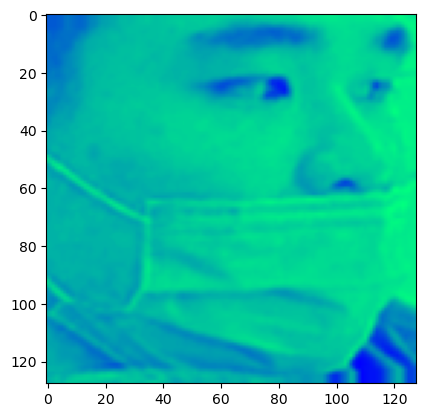

In [10]:
# viewing image on the train set
sample_num = 245
print(f'The Corresponding Label is :{Covid_Mask_Labels_train[sample_num]}')
plt.imshow(Covid_Mask_Images_train[sample_num][0], cmap='winter')
plt.show()

### Flatten Data

In [11]:
covid_train_images = Covid_Mask_Images_train.view(Covid_Mask_Images_train.shape[0], Covid_Mask_Images_train.shape[1] * Covid_Mask_Images_train.shape[2] * Covid_Mask_Images_train.shape[3])
covid_test_images = Covid_Mask_Images_test.view(Covid_Mask_Images_test.shape[0], Covid_Mask_Images_test.shape[1] * Covid_Mask_Images_test.shape[2] * Covid_Mask_Images_test.shape[3])

In [12]:
print(covid_train_images.shape, covid_test_images.shape)
print(covid_train_images.type(), covid_test_images.type())
print(Covid_Mask_Labels.type(), Covid_Mask_Labels.type())

torch.Size([7185, 49152]) torch.Size([1797, 49152])
torch.FloatTensor torch.FloatTensor
torch.LongTensor torch.LongTensor


The output means , the first dimension is the batch number and the second dimension is the number of input features.

## QUESTION 1

## Creating the two basic Neural Networks

##  Simple Neural Network

In [13]:
class Simple_NN(nn.Module):
    
    def __init__(self, n_features):
        super().__init__()
        self.fc1 = nn.Linear(n_features, 1000)
        self.fc2 = nn.Linear(1000, 700)
        self.fc3 = nn.Linear(700, 400)
        self.fc4 = nn.Linear(400, 50)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim = 1)
        return x

#### Creating Class object net

In [14]:
net_sim = Simple_NN(n_features = 49152)
net_sim

Simple_NN(
  (fc1): Linear(in_features=49152, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=700, bias=True)
  (fc3): Linear(in_features=700, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=50, bias=True)
)

#### Create our Optimizer and Loss Function

In [15]:
loss_function = nn.CrossEntropyLoss()
optimizer =  torch.optim.SGD(net_sim.parameters(), lr=0.01) #lr = Learning ate

In [16]:
epochs = 10
BATCH_SIZE = 100
for epoch in range (epochs):
    for i in tqdm(range(0,len(covid_train_images), BATCH_SIZE)):
        
        # Batching the Data
        batch_data = covid_train_images[i:i+BATCH_SIZE]
        batch_labels = Covid_Mask_Labels_train[i:i+BATCH_SIZE]
        
        
        net_sim.zero_grad()  
        output = net_sim(batch_data)  
        loss = loss_function(output, batch_labels) 
        loss.backward() 
        optimizer.step()  
    
    print(loss)

100%|██████████| 72/72 [00:17<00:00,  4.20it/s]


tensor(1.0202, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:18<00:00,  3.86it/s]


tensor(0.7230, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:19<00:00,  3.63it/s]


tensor(0.6107, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:20<00:00,  3.47it/s]


tensor(0.5435, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:20<00:00,  3.53it/s]


tensor(0.4972, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:20<00:00,  3.53it/s]


tensor(0.4599, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:20<00:00,  3.51it/s]


tensor(0.4295, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:21<00:00,  3.34it/s]


tensor(0.4068, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:20<00:00,  3.50it/s]


tensor(0.3879, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:20<00:00,  3.52it/s]

tensor(0.3742, grad_fn=<NllLossBackward0>)


#### GPU Training 
 Setting into GPU

In [17]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on the GPU")
else:
    device = torch.device("cpu")
    print("running on the CPU")

running on the CPU


converting the net to GPU

In [18]:
#converting net to GPU
net_sim = Simple_NN(n_features = 49152)
net_sim.to(device)

Simple_NN(
  (fc1): Linear(in_features=49152, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=700, bias=True)
  (fc3): Linear(in_features=700, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=50, bias=True)
)

Since it has now been converted, we can continue our model

once more, we specify the loss and optimizer

In [19]:
#Loss and Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer =  torch.optim.SGD(net_sim.parameters(), lr=0.01) #lr = Learning ate

#### GPU Training Loop

In [20]:
epochs = 10
BATCH_SIZE = 100
for epoch in range (epochs):
    for i in tqdm(range(0,len(covid_train_images), BATCH_SIZE)):
        
        # Batching the Data
        batch_data = covid_train_images[i:i+BATCH_SIZE]
        batch_labels = Covid_Mask_Labels_train[i:i+BATCH_SIZE]
        batch_data = batch_data.to(device)
        batch_labels = batch_labels.to(device)
        
        net_sim.zero_grad()  
        output = net_sim(batch_data)  
        loss = loss_function(output, batch_labels) 
        loss.backward() 
        optimizer.step()  
    
    print(loss)

100%|██████████| 72/72 [00:21<00:00,  3.32it/s]


tensor(1.0053, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:21<00:00,  3.38it/s]


tensor(0.7236, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:21<00:00,  3.34it/s]


tensor(0.6143, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:22<00:00,  3.19it/s]


tensor(0.5443, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:20<00:00,  3.43it/s]


tensor(0.4988, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:21<00:00,  3.33it/s]


tensor(0.4616, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:21<00:00,  3.30it/s]


tensor(0.4307, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:21<00:00,  3.38it/s]


tensor(0.4078, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:21<00:00,  3.29it/s]


tensor(0.3899, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:21<00:00,  3.32it/s]

tensor(0.3692, grad_fn=<NllLossBackward0>)


#### Testing Loop Validation

In [21]:
with torch.no_grad():
    predicted = net_sim.forward(covid_test_images.to(device))
    print(predicted[0:2], predicted[0:2].shape)
    
    
    # We want to select the class that has the highest value and, hence, the largest likelihood of being that number.
    predicted_classes = torch.argmax(predicted, dim = 1)
   

    print(predicted_classes[0:5])
    print(Covid_Mask_Labels_test[0:5])
    
    
    
# Since we have finished using the GPU, let's return our data to the CPU before we calculate accuracy and other factors.
#Functions that need data to be saved on the CPU cannot be used if this step is skipped (essentially everything)

device = torch.device('cpu')
predicted_classes = predicted_classes.to(device)
Covid_Mask_Labels_test = Covid_Mask_Labels_test.to(device)

tensor([[ -2.5458,  -1.4835,  -0.3642, -18.8793, -19.7410, -18.9147, -18.9055,
         -19.0746, -18.7904, -19.1494, -19.0630, -20.0023, -18.8078, -18.6009,
         -19.0140, -19.7463, -19.2419, -18.1416, -18.8012, -18.9729, -18.8724,
         -18.5294, -19.7111, -19.1843, -18.0569, -20.1768, -20.4414, -19.2213,
         -18.1495, -19.0468, -19.6199, -18.4530, -19.5549, -18.2017, -18.9057,
         -18.3714, -19.9965, -17.6796, -19.2856, -18.8107, -18.6043, -18.6072,
         -19.9104, -19.0339, -18.0031, -19.1218, -19.2212, -19.7198, -18.9975,
         -20.2373],
        [ -4.0414,  -2.3289,  -0.1221, -17.3990, -18.3198, -17.5780, -17.7066,
         -17.6739, -17.4398, -17.8092, -17.8274, -18.7025, -17.4216, -17.1610,
         -17.6585, -18.3146, -17.8091, -16.6771, -17.2556, -17.6713, -17.5487,
         -17.3535, -18.2014, -17.7651, -16.7346, -18.6262, -18.9245, -17.7321,
         -16.8811, -17.6961, -18.2424, -17.1559, -18.0786, -16.8096, -17.4500,
         -16.9641, -18.4665, -16

checking accuracy

In [22]:
#Accuracy check
correct = 0
total = 0
for i in range(len(predicted_classes)):

    if predicted_classes[i] == Covid_Mask_Labels_test[i]:
        correct += 1
    total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.803


In [23]:
#confusion matrics
cf_mat = confusion_matrix(Covid_Mask_Labels_test, predicted_classes)
cf_mat

array([[562,   1,   8],
       [244, 327,  46],
       [ 44,  11, 554]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix ')

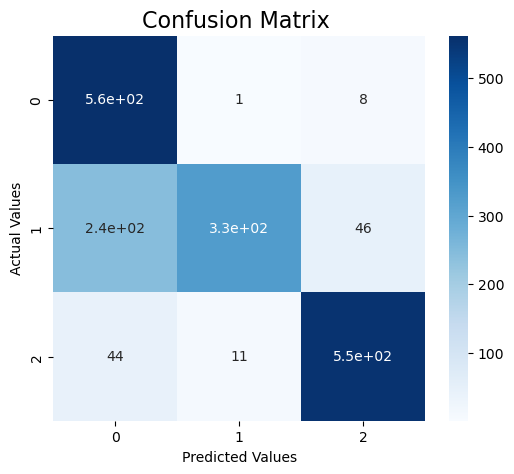

In [24]:
# Heat Map (Showing the confusion metrics)
plt.figure(figsize=(6,5))
cm = cf_mat
cm_plot = sns.heatmap(cm, annot = True, cmap = 'Blues');
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('Confusion Matrix ', size = 16)

## Convolutional Neural Network

In [25]:
# Performing the test- train split, setting apart 20% of the datasets for the test set
# This creates new varables, the training set and the test sets for the varibale x and y
Covid_Mask_Images_train, Covid_Mask_Images_test,Covid_Mask_Labels_train, Covid_Mask_Labels_test  = train_test_split(Covid_Mask_Images, Covid_Mask_Labels, test_size = 0.20, random_state = 0)

In [26]:
Covid_Mask_Labels_test

tensor([2, 2, 1,  ..., 0, 2, 2])

In [27]:
class Conv_NN(torch.nn.Module):

    def __init__(self, n_channels):
        super(Conv_NN, self).__init__()
        # 3 input image channel (RGB(Red,Green,Blues)), 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 6, kernel_size = (3,3) )
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16,  kernel_size = (3,3))
        # an affine operation: y = Wx + b
        self.fc1 = torch.nn.Linear(16 * 30 * 30, 120)  # 30*30 from image dimension
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 16 * 30 * 30)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim = 1)
        return x

    

In [28]:
net_conv  = Conv_NN(n_channels = 3)

In [29]:
test = net_conv.forward(Covid_Mask_Images_train[0:1])
test.shape 

torch.Size([1, 10])

In [30]:
#Loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_conv.parameters(), lr=0.01) #lr = Learning ate

In [31]:
epochs = 10
BATCH_SIZE = 100
for epoch in range (epochs):
    for i in tqdm(range(0,len(Covid_Mask_Images_train), BATCH_SIZE)):
        # Batch Our Data
        batch_data = Covid_Mask_Images_train[i:i+BATCH_SIZE]
        batch_labels = Covid_Mask_Labels_train[i:i+BATCH_SIZE]
        
        
        net_conv.zero_grad()  
        output = net_conv(batch_data)  
        loss = loss_function(output, batch_labels)  
        loss.backward()  
        optimizer.step()  
    
    print(loss)

100%|██████████| 72/72 [00:25<00:00,  2.82it/s]


tensor(1.0146, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:24<00:00,  2.88it/s]


tensor(0.7589, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:25<00:00,  2.88it/s]


tensor(0.5805, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:25<00:00,  2.81it/s]


tensor(0.5414, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:25<00:00,  2.84it/s]


tensor(0.5326, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:25<00:00,  2.85it/s]


tensor(0.4883, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:25<00:00,  2.86it/s]


tensor(0.4200, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:28<00:00,  2.51it/s]


tensor(0.3384, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:26<00:00,  2.69it/s]


tensor(0.2923, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:24<00:00,  2.89it/s]

tensor(0.2876, grad_fn=<NllLossBackward0>)


In [32]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on the GPU")
else:
    device = torch.device("cpu")
    print("running on the CPU")

running on the CPU


In [33]:
net_conv.to(device)

Conv_NN(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=14400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [34]:
#Loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_conv.parameters(), lr=0.01) #lr = Learning ate

In [35]:
#Training Loop CPU
epochs = 10
BATCH_SIZE = 100
for epoch in range (epochs):
    for i in tqdm(range(0,len(Covid_Mask_Images_train), BATCH_SIZE)):
        # Batch Our Data
        batch_data = Covid_Mask_Images_train[i:i+BATCH_SIZE]
        batch_labels = Covid_Mask_Labels_train[i:i+BATCH_SIZE]
        batch_data = batch_data.to(device)
        batch_labels = batch_labels.to(device)
        
        
        net_conv.zero_grad()  
        output = net_conv(batch_data)  
        
        loss = loss_function(output, batch_labels)  # calc and grab the loss value
        loss.backward()  
        optimizer.step()  
    
    print(loss)

100%|██████████| 72/72 [00:25<00:00,  2.80it/s]


tensor(0.2974, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:24<00:00,  2.92it/s]


tensor(0.2694, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:25<00:00,  2.85it/s]


tensor(0.2457, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:26<00:00,  2.74it/s]


tensor(0.2276, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:24<00:00,  2.88it/s]


tensor(0.2127, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:25<00:00,  2.84it/s]


tensor(0.1929, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:25<00:00,  2.86it/s]


tensor(0.1801, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:25<00:00,  2.78it/s]


tensor(0.1642, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:26<00:00,  2.72it/s]


tensor(0.1543, grad_fn=<NllLossBackward0>)


100%|██████████| 72/72 [00:27<00:00,  2.62it/s]

tensor(0.1448, grad_fn=<NllLossBackward0>)


In [36]:
#GPU Training Loop
with torch.no_grad():
    predicted = net_conv.forward(Covid_Mask_Images_train.to(device))
    print(predicted[0:2], predicted[0:2].shape)
    
    
    # We want to pick our the class with highest value, and thus highest probability of being that number
    predicted_classes = torch.argmax(predicted, dim = 1)
    # Our model seems pretty good!
    print(predicted_classes[0:5])
    print(Covid_Mask_Images_train[0:5])
    
    
    
    
# Since we have finished using the GPU, let's return our data to the CPU before we calculate accuracy and other factors.
#Functions that need data to be saved on the CPU cannot be used if this step is skipped (essentially everything)

device = torch.device('cpu')
predicted_classes = predicted_classes.to(device)
Covid_Mask_Images_train = Covid_Mask_Images_train.to(device)


tensor([[-2.9684e-03, -5.8345e+00, -1.0352e+01, -1.3219e+01, -1.3278e+01,
         -1.4090e+01, -1.4875e+01, -1.3561e+01, -1.3788e+01, -1.5155e+01],
        [-1.1212e+01, -6.1421e+00, -2.1765e-03, -1.4316e+01, -1.4034e+01,
         -1.3795e+01, -1.2535e+01, -1.4159e+01, -1.4131e+01, -1.2782e+01]]) torch.Size([2, 10])
tensor([0, 2, 1, 1, 0])
tensor([[[[0.2667, 0.2667, 0.2706,  ..., 0.3490, 0.3765, 0.4000],
          [0.2824, 0.2863, 0.2902,  ..., 0.3490, 0.3765, 0.4000],
          [0.3059, 0.3059, 0.3137,  ..., 0.3490, 0.3765, 0.4000],
          ...,
          [0.4549, 0.4588, 0.4588,  ..., 0.1176, 0.1098, 0.1020],
          [0.4549, 0.4588, 0.4588,  ..., 0.1333, 0.1255, 0.1137],
          [0.4549, 0.4588, 0.4588,  ..., 0.1529, 0.1451, 0.1333]],

         [[0.2000, 0.2000, 0.2000,  ..., 0.3137, 0.3412, 0.3647],
          [0.2118, 0.2157, 0.2157,  ..., 0.3137, 0.3412, 0.3647],
          [0.2235, 0.2314, 0.2353,  ..., 0.3137, 0.3412, 0.3647],
          ...,
          [0.4745, 0.4745, 0.47

In [37]:
#Prediction
predicted = net_conv.forward(Covid_Mask_Images_test)
predicted_classes = torch.argmax(predicted, dim = 1)
predicted_classes = predicted_classes.to(torch.device('cpu'))

Covid_Mask_Images_test = Covid_Mask_Images_test.to(torch.device('cpu'))

In [38]:
#Accuracy
correct = 0
total = 0
for i in range(len(predicted_classes)):

    if predicted_classes[i] == Covid_Mask_Labels_test[i]:
        correct += 1
    total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.895


In [39]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cf_mat = confusion_matrix(Covid_Mask_Labels_test, predicted_classes)
cf_mat

array([[571,   0,   0],
       [115, 450,  52],
       [ 18,   4, 587]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix ')

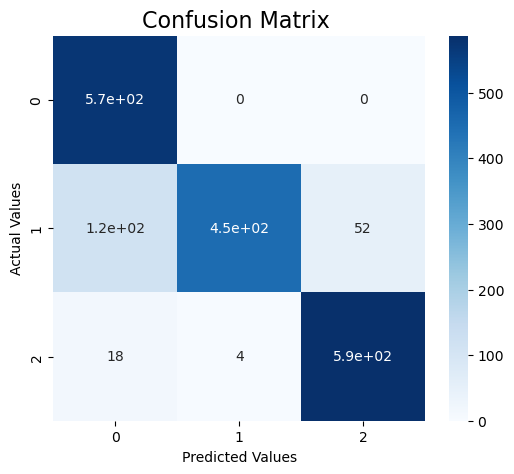

In [40]:
# Heat Map (Showing the confusion metrics)
plt.figure(figsize=(6,5))
cm = cf_mat
cm_plot = sns.heatmap(cm, annot = True, cmap = 'Blues');
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('Confusion Matrix ', size = 16)

## QUESTION 2

## Creating the two improved Neural Networks

## Improved Simple Neural Network

In [41]:
class Simple_NN(nn.Module):
    
    def __init__(self, n_features):
        super().__init__()
        self.fc1 = nn.Linear(n_features, 2000) 
        self.fc2 = nn.Linear(2000, 1500)
        self.fc3 = nn.Linear(1500, 1000)
        self.fc4 = nn.Linear(1000, 500)
        self.fc5 = nn.Linear(500, 50)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.log_softmax(self.fc5(x), dim = 1)
       
        return x

In [42]:
#Object net
net_sim = Simple_NN(n_features = 49152)
print(net_sim)

Simple_NN(
  (fc1): Linear(in_features=49152, out_features=2000, bias=True)
  (fc2): Linear(in_features=2000, out_features=1500, bias=True)
  (fc3): Linear(in_features=1500, out_features=1000, bias=True)
  (fc4): Linear(in_features=1000, out_features=500, bias=True)
  (fc5): Linear(in_features=500, out_features=50, bias=True)
)


In [43]:
#Loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer =  torch.optim.SGD(net_sim.parameters(), lr=0.01) #lr = Learning ate

epochs = 20
BATCH_SIZE = 150
for epoch in range (epochs):
    for i in tqdm(range(0,len(covid_train_images), BATCH_SIZE)):
        
        # Batching the Data
        batch_data = covid_train_images[i:i+BATCH_SIZE]
        batch_labels = Covid_Mask_Labels_train[i:i+BATCH_SIZE]
        
        
        net_sim.zero_grad()  
        
        # pass in the reshaped batch
        output = net_sim(batch_data)  
        
        # getting the loss value
        loss = loss_function(output, batch_labels)  
        loss.backward()  
        optimizer.step()  
    
    print(loss)

100%|██████████| 48/48 [00:39<00:00,  1.23it/s]


tensor(1.2743, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:40<00:00,  1.20it/s]


tensor(1.2832, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:38<00:00,  1.24it/s]


tensor(1.1994, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:39<00:00,  1.22it/s]


tensor(0.8153, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:39<00:00,  1.23it/s]


tensor(0.7097, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:38<00:00,  1.23it/s]


tensor(1.0921, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:41<00:00,  1.16it/s]


tensor(0.7449, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:38<00:00,  1.25it/s]


tensor(0.6362, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:39<00:00,  1.22it/s]


tensor(0.5708, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:42<00:00,  1.13it/s]


tensor(0.5220, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:38<00:00,  1.23it/s]


tensor(0.4812, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:39<00:00,  1.23it/s]


tensor(0.4577, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:38<00:00,  1.25it/s]


tensor(0.4212, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:38<00:00,  1.25it/s]


tensor(0.5096, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:39<00:00,  1.22it/s]


tensor(0.3907, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:37<00:00,  1.26it/s]


tensor(0.3552, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:38<00:00,  1.24it/s]


tensor(0.3353, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:38<00:00,  1.26it/s]


tensor(0.3403, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:38<00:00,  1.25it/s]


tensor(0.3179, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:37<00:00,  1.27it/s]

tensor(0.3441, grad_fn=<NllLossBackward0>)


In [44]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on the GPU")
else:
    device = torch.device("cpu")
    print("running on the CPU")

running on the CPU


In [45]:
net_sim = Simple_NN(n_features = 49152)
net_sim.to(device)

Simple_NN(
  (fc1): Linear(in_features=49152, out_features=2000, bias=True)
  (fc2): Linear(in_features=2000, out_features=1500, bias=True)
  (fc3): Linear(in_features=1500, out_features=1000, bias=True)
  (fc4): Linear(in_features=1000, out_features=500, bias=True)
  (fc5): Linear(in_features=500, out_features=50, bias=True)
)

In [46]:
#Loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer =  torch.optim.SGD(net_sim.parameters(), lr=0.01) #lr = Learning ate

In [47]:
epochs = 20
BATCH_SIZE = 150
for epoch in range (epochs):
    for i in tqdm(range(0,len(covid_train_images), BATCH_SIZE)):
        
        # Batching the Data
        batch_data = covid_train_images[i:i+BATCH_SIZE]
        batch_labels = Covid_Mask_Labels_train[i:i+BATCH_SIZE]
        batch_data = batch_data.to(device)
        batch_labels = batch_labels.to(device)
        
        net_sim.zero_grad()  # sets gradients to 0 before loss calc. 
        output = net_sim(batch_data)  
        
        loss = loss_function(output, batch_labels)  #getting the loss value
        loss.backward()  
        optimizer.step()  
    
    print(loss)

100%|██████████| 48/48 [00:38<00:00,  1.24it/s]


tensor(1.2922, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:42<00:00,  1.14it/s]


tensor(1.2737, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:38<00:00,  1.24it/s]


tensor(1.1354, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:37<00:00,  1.28it/s]


tensor(0.8125, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:38<00:00,  1.25it/s]


tensor(0.7388, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:37<00:00,  1.27it/s]


tensor(1.0989, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:37<00:00,  1.27it/s]


tensor(0.7478, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:39<00:00,  1.22it/s]


tensor(0.6470, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:37<00:00,  1.29it/s]


tensor(0.5843, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:39<00:00,  1.21it/s]


tensor(0.5363, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:38<00:00,  1.24it/s]


tensor(0.4957, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:38<00:00,  1.25it/s]


tensor(0.4611, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:37<00:00,  1.27it/s]


tensor(0.4350, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:38<00:00,  1.24it/s]


tensor(0.4071, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:39<00:00,  1.23it/s]


tensor(0.4638, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:37<00:00,  1.27it/s]


tensor(0.3626, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:38<00:00,  1.23it/s]


tensor(0.3834, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:37<00:00,  1.29it/s]


tensor(0.3305, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:37<00:00,  1.29it/s]


tensor(0.3205, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:40<00:00,  1.20it/s]

tensor(0.3159, grad_fn=<NllLossBackward0>)


In [48]:
with torch.no_grad():
    predicted = net_sim.forward(covid_test_images.to(device))
    print(predicted[0:2], predicted[0:2].shape)
    
    
    
    predicted_classes = torch.argmax(predicted, dim = 1)
   
    print(predicted_classes[0:5])
    print(Covid_Mask_Labels_test[0:5])
    
    
    

device = torch.device('cpu')
predicted_classes = predicted_classes.to(device)
Covid_Mask_Labels_test = Covid_Mask_Labels_test.to(device)

tensor([[ -5.5594,  -1.9801,  -0.1530, -20.1609, -20.0282, -19.4919, -19.1597,
         -19.8120, -19.7163, -19.0138, -19.9251, -19.7841, -19.6015, -19.5182,
         -18.5833, -19.3723, -19.9589, -19.4209, -20.6543, -19.8406, -19.2867,
         -20.0542, -20.2871, -20.0502, -19.2658, -19.9022, -19.2601, -19.9642,
         -19.2012, -20.7661, -20.3526, -19.8947, -20.0210, -19.3492, -20.7406,
         -19.5580, -20.8592, -18.9680, -20.1174, -20.1601, -18.9418, -19.1703,
         -20.1719, -19.4622, -19.9593, -19.5077, -19.9244, -19.1725, -18.8817,
         -19.7423],
        [ -7.0356,  -2.3890,  -0.0972, -19.6705, -19.4701, -18.9406, -18.6350,
         -19.2651, -19.1692, -18.5479, -19.4076, -19.1797, -19.0843, -19.0502,
         -18.1118, -18.9064, -19.4897, -18.8725, -20.1881, -19.3753, -18.7809,
         -19.5597, -19.7538, -19.6054, -18.8763, -19.4148, -18.7265, -19.4749,
         -18.7468, -20.1576, -19.7679, -19.3272, -19.4923, -18.8666, -20.2792,
         -19.1268, -20.3227, -18

In [49]:
#Calculating the Accuracy
correct = 0
total = 0
for i in range(len(predicted_classes)):

    if predicted_classes[i] == Covid_Mask_Labels_test[i]:
        correct += 1
    total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.882


In [50]:
#Confusion matrics
from sklearn.metrics import confusion_matrix

cf_mat = confusion_matrix(Covid_Mask_Labels_test, predicted_classes)
cf_mat

array([[493,  65,  13],
       [ 55, 512,  50],
       [  8,  21, 580]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix ')

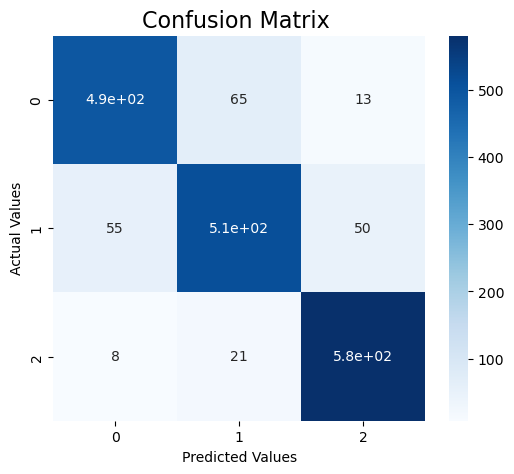

In [51]:
# Heat Map (Showing the confusion metrics)
plt.figure(figsize=(6,5))
cm = cf_mat
cm_plot = sns.heatmap(cm, annot = True, cmap = 'Blues');
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('Confusion Matrix ', size = 16)

## Improved Convolutional Neural Network

From the coding we must have noticed that net_sim is for the Simple Neural network and net_conv is for the Convolutional Neural network.
now to model for the imporved Convolutional neural.

In [52]:
#Loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_conv.parameters(), lr=0.0001) #lr = Learning ate

#Training Loop CPU
epochs = 20
BATCH_SIZE = 150
for epoch in range (epochs):
    for i in tqdm(range(0,len(Covid_Mask_Images_train), BATCH_SIZE)):
        # Batch Our Data
        batch_data = Covid_Mask_Images_train[i:i+BATCH_SIZE]
        batch_labels = Covid_Mask_Labels_train[i:i+BATCH_SIZE]
        batch_data = batch_data.to(device)
        batch_labels = batch_labels.to(device)
        
        
        net_conv.zero_grad()  
        output = net_conv(batch_data)  
        
        loss = loss_function(output, batch_labels)  # calc and grab the loss value
        loss.backward()  
        optimizer.step()  
    
    print(loss)

100%|██████████| 48/48 [00:25<00:00,  1.89it/s]


tensor(0.0877, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:21<00:00,  2.25it/s]


tensor(0.0857, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:21<00:00,  2.20it/s]


tensor(0.0886, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:21<00:00,  2.18it/s]


tensor(0.0912, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:21<00:00,  2.23it/s]


tensor(0.0928, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:20<00:00,  2.29it/s]


tensor(0.0937, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:22<00:00,  2.17it/s]


tensor(0.0941, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:22<00:00,  2.14it/s]


tensor(0.0943, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:21<00:00,  2.19it/s]


tensor(0.0944, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:21<00:00,  2.23it/s]


tensor(0.0945, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:21<00:00,  2.19it/s]


tensor(0.0945, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:22<00:00,  2.18it/s]


tensor(0.0945, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:21<00:00,  2.26it/s]


tensor(0.0945, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:21<00:00,  2.19it/s]


tensor(0.0945, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:21<00:00,  2.19it/s]


tensor(0.0945, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:21<00:00,  2.27it/s]


tensor(0.0945, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:21<00:00,  2.24it/s]


tensor(0.0945, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:22<00:00,  2.14it/s]


tensor(0.0945, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:22<00:00,  2.16it/s]


tensor(0.0945, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:21<00:00,  2.20it/s]

tensor(0.0944, grad_fn=<NllLossBackward0>)


In [53]:
#GPU Training Loop
with torch.no_grad():
    predicted = net_conv.forward(Covid_Mask_Images_train.to(device))
    print(predicted[0:2], predicted[0:2].shape)
    
    
    # We want to pick our the class with highest value, and thus highest probability of being that number
    predicted_classes = torch.argmax(predicted, dim = 1)
    # Our model seems pretty good!
    print(predicted_classes[0:5])
    print(Covid_Mask_Images_train[0:5])
    
    
    
    
# Since we have finished using the GPU, let's return our data to the CPU before we calculate accuracy and other factors.
#Functions that need data to be saved on the CPU cannot be used if this step is skipped (essentially everything)

device = torch.device('cpu')
predicted_classes = predicted_classes.to(device)
Covid_Mask_Images_train = Covid_Mask_Images_train.to(device)

tensor([[-1.6702e-02, -4.1052e+00, -9.8219e+00, -1.2106e+01, -1.2113e+01,
         -1.3053e+01, -1.3816e+01, -1.2400e+01, -1.2680e+01, -1.4068e+01],
        [-1.1990e+01, -5.3262e+00, -4.8931e-03, -1.4220e+01, -1.3811e+01,
         -1.3661e+01, -1.2370e+01, -1.3963e+01, -1.3955e+01, -1.2594e+01]]) torch.Size([2, 10])
tensor([0, 2, 1, 1, 0])
tensor([[[[0.2667, 0.2667, 0.2706,  ..., 0.3490, 0.3765, 0.4000],
          [0.2824, 0.2863, 0.2902,  ..., 0.3490, 0.3765, 0.4000],
          [0.3059, 0.3059, 0.3137,  ..., 0.3490, 0.3765, 0.4000],
          ...,
          [0.4549, 0.4588, 0.4588,  ..., 0.1176, 0.1098, 0.1020],
          [0.4549, 0.4588, 0.4588,  ..., 0.1333, 0.1255, 0.1137],
          [0.4549, 0.4588, 0.4588,  ..., 0.1529, 0.1451, 0.1333]],

         [[0.2000, 0.2000, 0.2000,  ..., 0.3137, 0.3412, 0.3647],
          [0.2118, 0.2157, 0.2157,  ..., 0.3137, 0.3412, 0.3647],
          [0.2235, 0.2314, 0.2353,  ..., 0.3137, 0.3412, 0.3647],
          ...,
          [0.4745, 0.4745, 0.47

In [54]:
#Prediction
predicted = net_conv.forward(Covid_Mask_Images_test)
predicted_classes = torch.argmax(predicted, dim = 1)
predicted_classes = predicted_classes.to(torch.device('cpu'))

Covid_Mask_Images_test = Covid_Mask_Images_test.to(torch.device('cpu'))

In [55]:
#Accuracy
correct = 0
total = 0
for i in range(len(predicted_classes)):

    if predicted_classes[i] == Covid_Mask_Labels_test[i]:
        correct += 1
    total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.938


In [56]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cf_mat = confusion_matrix(Covid_Mask_Labels_test, predicted_classes)
cf_mat

array([[561,  10,   0],
       [ 36, 543,  38],
       [ 13,  15, 581]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix ')

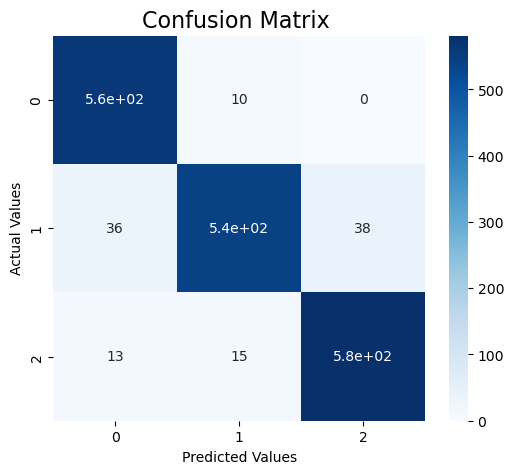

In [57]:
# Heat Map (Showing the confusion metrics)
plt.figure(figsize=(6,5))
cm = cf_mat
cm_plot = sns.heatmap(cm, annot = True, cmap = 'Blues');
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('Confusion Matrix ', size = 16)

#### Comparative Analysis between the Basic and Improved Models

The comparative analysis of the two improved models, discussing 
the changes I made and how they’ve improved on the basic models.

#### For the Simple Neural Network ( Comparing Basic and Improved)

One strategy I implemented to boost the performance of the basic neural network is to add more layer to the network. This can help the network to learn more sophisticated representations and catch more subtle patterns in the input. The network's performance on a validation set must also be monitored to make sure it isn't overfitting, as adding additional layers may increase the risk of overfitting. Changing the number of neurons in each layer of the fundamental neural network is another approach to customise it. The network can learn more intricate representations with the assistance of more neurons, but there is a danger of overfitting. On the other hand, fewer neurons might make the network simpler and less susceptible to overfitting, that is, reducing the neurons from larger to smaller. Also modified the epoch from 10 to 20 and the batch size from 100 to 150, we now observe a change in the accuracy from 80.20% to 88.80% which is a nice improvement.


#### For the Convolutional Neural Network (Comparing Basic and Improved)

The epoch in this case has been changed from 10 to 20, the learning rate has been changed from 0.01 to 0.0001, and the batch size has been raised from 100 to 150. which allows us to see the accuracy go from 88% to 93.70%, which is a nice and positive development.

# PART 2

## QUESTION 1

Using only optimized Convolutional Neural Network created.Want to Test a learning rate of 0.00000001 vs a learning rate of 10

##### For learning rate of 0.00000001, we have the model to be as follows

In [58]:
#Loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_conv.parameters(), lr= 0.00000001)  #lr = Learning ate

#Training Loop CPU
epochs = 20
BATCH_SIZE = 150
for epoch in range (epochs):
    for i in tqdm(range(0,len(Covid_Mask_Images_train), BATCH_SIZE)):
        # Batch Our Data
        batch_data = Covid_Mask_Images_train[i:i+BATCH_SIZE]
        batch_labels = Covid_Mask_Labels_train[i:i+BATCH_SIZE]
        batch_data = batch_data.to(device)
        batch_labels = batch_labels.to(device)
        
        
        net_conv.zero_grad()  
        output = net_conv(batch_data)  
        
        loss = loss_function(output, batch_labels)  # calc and grab the loss value
        loss.backward()  
        optimizer.step()  
    
    print(loss)

100%|██████████| 48/48 [00:25<00:00,  1.90it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.93it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.93it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.95it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.99it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:25<00:00,  1.91it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.96it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:26<00:00,  1.82it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.98it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.97it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:25<00:00,  1.91it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.98it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.95it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.94it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:27<00:00,  1.75it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.98it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.94it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.95it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  2.00it/s]


tensor(0.0940, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:25<00:00,  1.88it/s]

tensor(0.0940, grad_fn=<NllLossBackward0>)


In [59]:
#GPU Training Loop
with torch.no_grad():
    predicted = net_conv.forward(Covid_Mask_Images_train.to(device))
    print(predicted[0:2], predicted[0:2].shape)
    
    
    # We want to pick our the class with highest value, and thus highest probability of being that number
    predicted_classes = torch.argmax(predicted, dim = 1)
    # Our model seems pretty good!
    print(predicted_classes[0:5])
    print(Covid_Mask_Images_train[0:5])
    
    
    
    
# Since we have finished using the GPU, let's return our data to the CPU before we calculate accuracy and other factors.
#Functions that need data to be saved on the CPU cannot be used if this step is skipped (essentially everything)

device = torch.device('cpu')
predicted_classes = predicted_classes.to(device)
Covid_Mask_Images_train = Covid_Mask_Images_train.to(device)

tensor([[-1.6702e-02, -4.1052e+00, -9.8219e+00, -1.2106e+01, -1.2113e+01,
         -1.3053e+01, -1.3816e+01, -1.2400e+01, -1.2680e+01, -1.4068e+01],
        [-1.1990e+01, -5.3262e+00, -4.8931e-03, -1.4220e+01, -1.3811e+01,
         -1.3661e+01, -1.2370e+01, -1.3963e+01, -1.3955e+01, -1.2594e+01]]) torch.Size([2, 10])
tensor([0, 2, 1, 1, 0])
tensor([[[[0.2667, 0.2667, 0.2706,  ..., 0.3490, 0.3765, 0.4000],
          [0.2824, 0.2863, 0.2902,  ..., 0.3490, 0.3765, 0.4000],
          [0.3059, 0.3059, 0.3137,  ..., 0.3490, 0.3765, 0.4000],
          ...,
          [0.4549, 0.4588, 0.4588,  ..., 0.1176, 0.1098, 0.1020],
          [0.4549, 0.4588, 0.4588,  ..., 0.1333, 0.1255, 0.1137],
          [0.4549, 0.4588, 0.4588,  ..., 0.1529, 0.1451, 0.1333]],

         [[0.2000, 0.2000, 0.2000,  ..., 0.3137, 0.3412, 0.3647],
          [0.2118, 0.2157, 0.2157,  ..., 0.3137, 0.3412, 0.3647],
          [0.2235, 0.2314, 0.2353,  ..., 0.3137, 0.3412, 0.3647],
          ...,
          [0.4745, 0.4745, 0.47

In [60]:
#Prediction
predicted = net_conv.forward(Covid_Mask_Images_test)
predicted_classes = torch.argmax(predicted, dim = 1)
predicted_classes = predicted_classes.to(torch.device('cpu'))
Covid_Mask_Images_test = Covid_Mask_Images_test.to(torch.device('cpu'))

In [61]:
#Accuracy
correct = 0
total = 0
for i in range(len(predicted_classes)):

    if predicted_classes[i] == Covid_Mask_Labels_test[i]:
        correct += 1
    total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.938


##### For learning rate of 10, we have the model to be as follows

In [62]:
#Loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_conv.parameters(), lr= 10) #lr = Learning ate

#Training Loop CPU
epochs = 20
BATCH_SIZE = 150
for epoch in range (epochs):
    for i in tqdm(range(0,len(Covid_Mask_Images_train), BATCH_SIZE)):
        # Batch Our Data
        batch_data = Covid_Mask_Images_train[i:i+BATCH_SIZE]
        batch_labels = Covid_Mask_Labels_train[i:i+BATCH_SIZE]
        batch_data = batch_data.to(device)
        batch_labels = batch_labels.to(device)
        
        
        net_conv.zero_grad()  
        output = net_conv(batch_data)  
        
        loss = loss_function(output, batch_labels)  # calc and grab the loss value
        loss.backward()  
        optimizer.step()  
    
    print(loss)

100%|██████████| 48/48 [00:24<00:00,  1.97it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.94it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:23<00:00,  2.02it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.98it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.94it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.97it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.98it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.98it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:27<00:00,  1.73it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.99it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.96it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.97it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.97it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.97it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.97it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.99it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.94it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:23<00:00,  2.04it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:25<00:00,  1.88it/s]


tensor(nan, grad_fn=<NllLossBackward0>)


100%|██████████| 48/48 [00:24<00:00,  1.99it/s]

tensor(nan, grad_fn=<NllLossBackward0>)


In [63]:
#GPU Training Loop
with torch.no_grad():
    predicted = net_conv.forward(Covid_Mask_Images_train.to(device))
    print(predicted[0:2], predicted[0:2].shape)
    
    
    # We want to pick our the class with highest value, and thus highest probability of being that number
    predicted_classes = torch.argmax(predicted, dim = 1)
    # Our model seems pretty good!
    print(predicted_classes[0:5])
    print(Covid_Mask_Images_train[0:5])
    
    
    
    
# Since we have finished using the GPU, let's return our data to the CPU before we calculate accuracy and other factors.
#Functions that need data to be saved on the CPU cannot be used if this step is skipped (essentially everything)

device = torch.device('cpu')
predicted_classes = predicted_classes.to(device)
Covid_Mask_Images_train = Covid_Mask_Images_train.to(device)

tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]) torch.Size([2, 10])
tensor([0, 0, 0, 0, 0])
tensor([[[[0.2667, 0.2667, 0.2706,  ..., 0.3490, 0.3765, 0.4000],
          [0.2824, 0.2863, 0.2902,  ..., 0.3490, 0.3765, 0.4000],
          [0.3059, 0.3059, 0.3137,  ..., 0.3490, 0.3765, 0.4000],
          ...,
          [0.4549, 0.4588, 0.4588,  ..., 0.1176, 0.1098, 0.1020],
          [0.4549, 0.4588, 0.4588,  ..., 0.1333, 0.1255, 0.1137],
          [0.4549, 0.4588, 0.4588,  ..., 0.1529, 0.1451, 0.1333]],

         [[0.2000, 0.2000, 0.2000,  ..., 0.3137, 0.3412, 0.3647],
          [0.2118, 0.2157, 0.2157,  ..., 0.3137, 0.3412, 0.3647],
          [0.2235, 0.2314, 0.2353,  ..., 0.3137, 0.3412, 0.3647],
          ...,
          [0.4745, 0.4745, 0.4745,  ..., 0.0980, 0.0824, 0.0784],
          [0.4745, 0.4745, 0.4745,  ..., 0.1059, 0.1020, 0.0902],
          [0.4745, 0.4745, 0.4745,  ..., 0.1255, 0.1176, 0.1059]],

         

In [64]:
#Prediction
predicted = net_conv.forward(Covid_Mask_Images_test)
predicted_classes = torch.argmax(predicted, dim = 1)
predicted_classes = predicted_classes.to(torch.device('cpu'))

Covid_Mask_Images_test = Covid_Mask_Images_test.to(torch.device('cpu'))

In [65]:
#Accuracy
correct = 0
total = 0
for i in range(len(predicted_classes)):

    if predicted_classes[i] == Covid_Mask_Labels_test[i]:
        correct += 1
    total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.318


Now,to compare the results.


The performance of a convolutional neural network can vary significantly depending on the learning rate that is selected during training. We tested two extreme learning rate values in the code previously mentioned: a very low value of 0.00000001 and a very high value of 10. What happens when these values are used is as follows:

A hyperparameter called learning rate controls how rapidly a neural network's weights are changed during training. When the learning rate is high, the weights are updated quickly, and when the learning rate is low, the weights are updated gradually. Poor performance may result from weights that become unstable too rapidly due to an excessive learning rate. Poor performance can also result from weights that never converge to ideal values if the learning rate is too slow.

When the model is updated relatively slowly when the learning rate of 0.00000001 was being used, the model takes longer to converge. When a learning rate of 10 is used, the model converges more efficiently, but there is a possibility that the data will be overfit.

Also,With a sluggish learning rate: It may take several epochs for the model to converge to an appropriate solution. This is due to the optimizer moving through the parameter space in very tiny steps, which can be helpful for avoiding overshooting the optimal point but can also cause the optimization process to move very slowly. 2.With a high learning rate: Over time, the model's accuracy may change dramatically, and it might even fail to converge to a useful answer. This is due to the optimizer's use of very large steps in the parameter space, which can be advantageous for fast locating the optimal point but can also lead to overshoot and divergence in the optimization process.

Generally speaking, determining the right learning rate depends on the particulars of the issue being handled and the design of the neural network. Whereas a learning rate that is too high can cause divergence or oscillation at the ideal point, a learning rate that is too low can cause delayed convergence or being stuck in local minima.

Furthermore, 

The weights are updated relatively slowly when a learning rate of 0.00000001 is applied, which might cause the weights to never converge to the ideal values. As a result, the model may perform poorly since the weights will never be properly tuned.

The weights are changed very aggressively when a learning rate of 10 is applied, which might cause the weights to become unstable and converge to suboptimal values. As a result, the model may perform poorly since the weights are not properly tuned.

In addition,

The accuracy also as a slight change from 93.70% which is for the learning rate of 0.00000001, to 31.80% which is for the learning rate of 10. This shows that adopting a higher learning rate makes the model performance suffer because the weights becomes unstable. This is because the model may not be properly optimized if the weights are changed too rapidly, causing them to bounce around the ideal values and making the accuracy low.

## Higher learning rate
#### Benefits of a higher learning rate include:

1.May result in shorter training times and faster convergence.

2.Helpful when the goal is to identify a decent solution rapidly by exploring the parameter space.

3.Can be useful for simple datasets or shallow neural networks.

4.Can function well with deep neural networks or complex datasets, enabling the optimizer to carefully explore the parameter space and come up with a viable solution.

5.Assists in preventing overshooting the ideal point and becoming trapped in local minima.

6.May result in improved generalization and more stable optimization.

#### Higher learning rate have to following drawbacks

1.An overfitting of the model to the data may result from a high learning rate.

2.With a high learning rate, the model could diverge rather than converge.

3.A model may converge to a less-than-ideal outcome too rapidly if the learning rate is too high.


## Lower learning rate
#### Benefits of a lower learning rate:

1.May result in diverging and overshooting the ideal spot, resulting in subpar performance.

2.May make the model unstable and lead it to oscillate around the ideal point.

3.May be ineffectual when used with deep neural networks or complex datasets.


#### Lower learning rates have the following drawbacks:

1.May lead to very sluggish convergence and extended training periods. To perform at the same level as a greater learning rate, it might take longer epochs.

2.May be ineffective for shallow neural networks or simple datasets.

3.In a similar vein, the decision regarding batch size can have a big impact on how a neural network is trained. The following are some benefits and drawbacks of larger and smaller batch sizes.



      
In summary,

For higher learning rate, the training time can be shortened by using an higher learning rate since the weights will be updated more rapidly. This implies that training a model may be faster. A higher learning rate also has the benefit of assisting in avoiding local minima if the weights are not fully tuned.

The biggest drawback of adopting a higher learning rate is that the model's performance may suffer if the weights become unstable. This is because the model may not be properly optimized if the weights are changed too rapidly, causing them to bounce around the ideal values.

Using a lower learning rate has the primary benefit of preventing oscillations around the ideal values, which can assist to guarantee that the model has been thoroughly tuned. The model is less likely to become unstable when utilizing a lower learning rate, which has another benefit of improving performance.

Training the model could take longer when using a lower learning rate which is a drawback since the weights are increased more gradually. As a result, the model could take longer to run at its best, which could affect how well the model performs overall.








.




## QUESTION 2


## Higher batch size
#### Benefits of a Higher batch size:

1.May result in shorter training periods, particularly when using GPU hardware

2.As the gradient is computed over more data points, it may result in more stable gradient estimates and better convergence.

3.Can use vectorized operations, which on systems with SIMD (Single Instruction Multiple Data) capabilities may be more effective.

#### Draw backs  of a higher batch size:

1.May restrict the size of the model that can be learned by requiring additional memory to hold intermediate computations.

2.When the batch size is too big, noisy gradient estimations may result in unsatisfactory solutions.

3.Due to less frequent model updates, it may take longer to get the ideal solution.


## Lower Batch size
#### Benefits of a lower batch size:

1.As the model is updated more frequently and exposed to a wider variety of training samples, it may improve generalization.

2.May be more memory-efficient, enabling the training of larger models.

3.When the batch size is small enough, it may result in more precise gradient estimations.

#### Draw backs of a lower batch size:

1.May cause training times to take longer, especially on GPU hardware.

2.May result in unstable gradients because of noise.

3.The difference could not be statistically significant because improvements might occur too gradually.




In general and full explanation, we can summarize by saying:

While fewer data are processed during each iteration, a smaller batch size might result in longer training periods. Yet, because the model is exposed to less fluctuation in the data, a smaller batch size may make it simpler to improve the model.

The key benefit of employing a larger batch size is that since more data are processed during each iteration, training durations may be shortened. The time needed to train a model may be shortened as a result.

The main disadvantage of using a higher batch size is that it can make it more difficult to optimize the model as the model is exposed to more variation in the data. This can lead to poor performance of the model as it will not be fully optimized.

The key benefit of having a smaller batch size is that because the model is exposed to less fluctuation in the data, it may be simpler to improve the model. As a result of being fully optimized, the model may perform better.

The major drawback of having a smaller batch size is that because fewer data are processed during each iteration, training periods may be longer as a result. As a result, the model may take longer to execute at its peak level, which may have an effect on the model's overall performance.
